# C.7.9 Logistic Regression 모델 (계속)

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('2014DC2_dummy_indicator_friendly.csv')   
df.shape

(12417, 193)

In [3]:
# Imputation indicator가 생성됨에 주의

data = df.drop(['EBizSystem2'], axis=1)   # 타겟변수를 제외한 변수만 data 데이터프레임에 저장
target = df['EBizSystem2']                # 타겟변수만 target 데이터프레임에 저장

# 50:50 data partition.
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    data, target, test_size=0.5, random_state=42)   # test_size=0.5임에 주의 

# interval 변수의 null value를 평균(mean)으로 대체.
from sklearn.impute import SimpleImputer
imp= SimpleImputer(strategy = 'mean', add_indicator = 'True')  
X_train2= imp.fit_transform(X_train) 
X_test2= imp.fit_transform(X_test)   # X_train과 and X_test 둘 다 imputation 적용해야 함에 유의

print("X_train2 shape:", X_train2.shape) 
print("X_test2 shape:", X_test2.shape) 

X_train2 shape: (6208, 214)
X_test2 shape: (6209, 214)


In [4]:
# Logistic Regression 모형 (max_iter = 10,000)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(solver='lbfgs',penalty='none',max_iter=10000,random_state=0)
model = lr.fit(X_train2, y_train)
pred = model.predict(X_test2)
                            
print("Logreg Training set score:{:.5f}".format(model.score(X_train2, y_train)))
print("Logreg Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

Logreg Training set score:0.74565
Logreg Test set score:0.72991


In [6]:
# Logistic Regression 모형 (Default 모델)
lr = LogisticRegression(solver='lbfgs',penalty='none',max_iter=10000,random_state=0,
                            n_jobs=-1)

In [5]:
# 워닝을 피하기 위해 위의 LogisticRegression( )의 max_iter 옵션값을 10,000 이상으로 설정해야 함에 주의

import time
start = time.time()

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold  

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정합니다.
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
params = {'solver':['lbfgs', 'saga'], 'penalty':['none','l2']}

grid_lr = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=cross_validation,\
                       n_jobs=-1)
grid_lr.fit(X_train2, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_lr.best_score_))
print("GridSearchCV best parameter:", (grid_lr.best_params_)) 

end = time.time()
print(f"Runtime of the program is {end - start}")

GridSearchCV max accuracy:0.72020
GridSearchCV best parameter: {'penalty': 'l2', 'solver': 'lbfgs'}
Runtime of the program is 199.71517539024353


In [7]:
best_clf = grid_lr.best_estimator_
pred = best_clf.predict(X_test2)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test2)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.73120
ROC AUC on test set:0.78831


In [8]:
# 워닝을 피하기 위해 위의 max_iter를 10,000으로 설정해야 함에 주의

import time
start = time.time()

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold  

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정합니다.
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
params = {'solver':['lbfgs', 'saga'], 'penalty':['none']}

grid_lr = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=cross_validation,\
                       n_jobs=-1)
grid_lr.fit(X_train2, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_lr.best_score_))
print("GridSearchCV best parameter:", (grid_lr.best_params_)) 

end = time.time()
print(f"Runtime of the program is {end - start}")

GridSearchCV max accuracy:0.71875
GridSearchCV best parameter: {'penalty': 'none', 'solver': 'saga'}
Runtime of the program is 313.6412374973297


In [9]:
best_clf = grid_lr.best_estimator_
pred = best_clf.predict(X_test2)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test2)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.72975
ROC AUC on test set:0.78694


In [11]:
df.isna().any()[lambda x: x]   # 결측값을 갖고 있는 변수명(컬럼명) 찾기

Asset7             True
Asset9             True
B2B_purchase1      True
Cost12             True
Cost13             True
Cost16             True
Cost17             True
Design1            True
ITAssetC           True
Liability3         True
OutsourcingCost    True
Patent1            True
RNDcost1           True
TAssetC1           True
TAssetC2           True
TAssetC3           True
TAssetC4           True
TAssetC5           True
TAssetC6           True
TAssetC8           True
TradeMark1         True
emp66              True
dtype: bool

In [12]:
# 특정 변수에 대한 imputation indicator 생성
df['RNDcost1_ind'] = np.where(df['RNDcost1'].isnull(),1,0)

In [13]:
df[['RNDcost1', 'RNDcost1_ind']].head(10)

,RNDcost1,RNDcost1_ind
0,NaN,1
1,NaN,1
2,NaN,1
3,NaN,1
4,NaN,1
5,6.011267,0
6,NaN,1
7,1.386294,0
8,7.263330,0
9,5.958425,0


In [14]:
df['Asset7_ind'] = np.where(df['Asset7'].isnull(),1,0)
df['Asset9_ind'] = np.where(df['Asset9'].isnull(),1,0)
df['B2B_purchase1_ind'] = np.where(df['B2B_purchase1'].isnull(),1,0)
df['Cost12_ind'] = np.where(df['Cost12'].isnull(),1,0)
df['Cost13_ind'] = np.where(df['Cost13'].isnull(),1,0)
df['Cost16_ind'] = np.where(df['Cost16'].isnull(),1,0)
df['Cost17_ind'] = np.where(df['Cost17'].isnull(),1,0)
df['Design1_ind'] = np.where(df['Design1'].isnull(),1,0)
df['ITAssetC_ind'] = np.where(df['ITAssetC'].isnull(),1,0)
df['Liability3_ind'] = np.where(df['Liability3'].isnull(),1,0)
df['OutsourcingCost_ind'] = np.where(df['OutsourcingCost'].isnull(),1,0)
df['Patent1_ind'] = np.where(df['Patent1'].isnull(),1,0)
df['TAssetC1_ind'] = np.where(df['TAssetC1'].isnull(),1,0)
df['TAssetC2_ind'] = np.where(df['TAssetC2'].isnull(),1,0)
df['TAssetC3_ind'] = np.where(df['TAssetC3'].isnull(),1,0)
df['TAssetC4_ind'] = np.where(df['TAssetC4'].isnull(),1,0)
df['TAssetC5_ind'] = np.where(df['TAssetC5'].isnull(),1,0)
df['TAssetC6_ind'] = np.where(df['TAssetC6'].isnull(),1,0)
df['TAssetC8_ind'] = np.where(df['TAssetC8'].isnull(),1,0)
df['TradeMark1_ind'] = np.where(df['TradeMark1'].isnull(),1,0)
df['emp66_ind'] = np.where(df['emp66'].isnull(),1,0)

In [16]:
df.shape

(12417, 215)

In [17]:
df.to_csv('2014DC2_dummy_imp_indicator.csv', index=False)

In [10]:
import pandas as pd
import numpy as np
df = pd.read_csv('2014DC2_dummy_imp_indicator.csv')   
df.shape

(12417, 215)

In [11]:
# SimpleImputer의 add_indicator 옵션을 제거한 버전

data = df.drop(['EBizSystem2'], axis=1)   # 타겟변수를 제외한 입력변수를 data에 저장
target = df['EBizSystem2']                # 타겟변수만 target에 저장

# 50:50 data partition.
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    data, target, test_size=0.5, random_state=42)   # test_size=0.5임에 주의 

# interval 변수의 null value를 평균(mean)으로 impute. 
from sklearn.impute import SimpleImputer
imp= SimpleImputer(strategy = 'mean')  
X_train2= imp.fit_transform(X_train) 
X_test2= imp.fit_transform(X_test)   # X_train과 and X_test 둘 다 imputation 적용해야 함에 유의

print("X_train2 shape:", X_train2.shape) 
print("X_test2 shape:", X_test2.shape) 

X_train2 shape: (6208, 214)
X_test2 shape: (6209, 214)


In [12]:
# Logistic Regression 모형 (Default 모델)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(solver='lbfgs',penalty='none',max_iter=10000,random_state=0,
                        n_jobs=-1)

In [13]:
import time
start = time.time()

# 워닝을 피하기 위해 위의 max_iter를 10,000으로 설정해야 함에 주의
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold  

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
params = {'solver':['lbfgs', 'saga'], 'penalty':['none']}

grid_lr = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=cross_validation,
                       n_jobs=-1)
grid_lr.fit(X_train2, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_lr.best_score_))
print("GridSearchCV best parameter:", (grid_lr.best_params_)) 

end = time.time()
print(f"Runtime of the program is {end - start}")

GridSearchCV max accuracy:0.71875
GridSearchCV best parameter: {'penalty': 'none', 'solver': 'saga'}
Runtime of the program is 247.5399672985077


In [14]:
best_clf = grid_lr.best_estimator_
pred = best_clf.predict(X_test2)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test2)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.72975
ROC AUC on test set:0.78694


In [15]:
print('절편', best_clf.intercept_)
print('회귀계수', np.round(best_clf.coef_, 2))

절편 [-3.76427884]
회귀계수 [[ 0.05  0.02  0.02  0.03 -0.02  0.01  0.05 -0.06 -0.02  0.01 -0.02 -0.02
  -0.05  0.09  0.02 -0.02  0.15  0.04 -0.01  0.05  0.02 -0.   -0.01  0.06
   0.02 -0.01 -0.   -0.01 -0.01  0.02 -0.    0.02 -0.01  0.15  0.09 -0.03
   0.67 -0.03  0.4  -0.41  0.13  0.49  0.3  -1.66 -0.11  0.02  0.09 -0.32
   0.2   0.41  0.   -0.01 -0.11  0.19  0.26  0.19 -0.24  0.21  0.05  0.06
  -0.38 -0.32  0.65  0.33  0.23  0.18  0.16  0.02  0.05  0.45 -0.08 -0.12
   0.74  0.14  0.02  0.23  0.2   0.45  0.41  0.    0.14 -0.04  0.14 -0.46
  -0.    0.14  0.6   0.06  0.26  0.12  0.27  0.29  0.37  0.22  0.16  0.16
   0.32  0.02  0.    0.29 -0.63  0.26 -0.54  0.45  0.04  0.49 -0.08 -0.4
  -0.28  0.15 -0.17 -0.23 -1.52 -0.13  0.31 -0.44  0.09 -0.17 -0.21 -1.11
  -0.05 -0.26  0.16  0.25  0.32  0.22  0.2   0.2   0.15  0.5   0.18  0.38
   1.74 -0.18 -0.57 -1.22 -0.37  1.37 -0.06 -0.04  0.21  0.31 -0.62 -0.18
   0.07  0.15  0.11  0.09 -0.08 -0.46 -0.48  0.    1.31 -0.43 -0.17 -0.04
   0.16 -0.2  -0.

In [16]:
# 변수명을 Index로 만들고 coefficient값을 매칭한 데이터프레임 만들기 

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.round(best_clf.coef_, 3).transpose(), index=feature_names,
                   columns=['coef'])
dft1 = dft.sort_values(by='coef', ascending=False)   # 컬럼 coef의 값들을 오름차순으로 정리
dft1                                            

,coef
Cost17_ind,1.791
IndCategory2_32,1.741
IndCategory2_39,1.368
IndCategory2_61,1.310
TAssetC5_ind,0.986
...,...
IndCategory1_encoded_15.0,-1.162
IndCategory2_37,-1.216
IndCategory2_73,-1.392
IndCategory2_12,-1.520


In [17]:
# 변수명을 Index로 만들고 coefficient값을 제곱한 Odds ratio값을 Index에 매칭한 데이터프레임 만들기 

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.round(np.exp(best_clf.coef_),3).transpose(), index=feature_names,
                   columns=['Odds_ratio'])
dft1 = dft.sort_values(by='Odds_ratio', ascending=False)   # 컬럼 coef의 값들을 오름차순으로 정리
dft1                                            

,Odds_ratio
Cost17_ind,5.997
IndCategory2_32,5.702
IndCategory2_39,3.926
IndCategory2_61,3.706
TAssetC5_ind,2.679
...,...
IndCategory1_encoded_15.0,0.313
IndCategory2_37,0.296
IndCategory2_73,0.248
IndCategory2_12,0.219


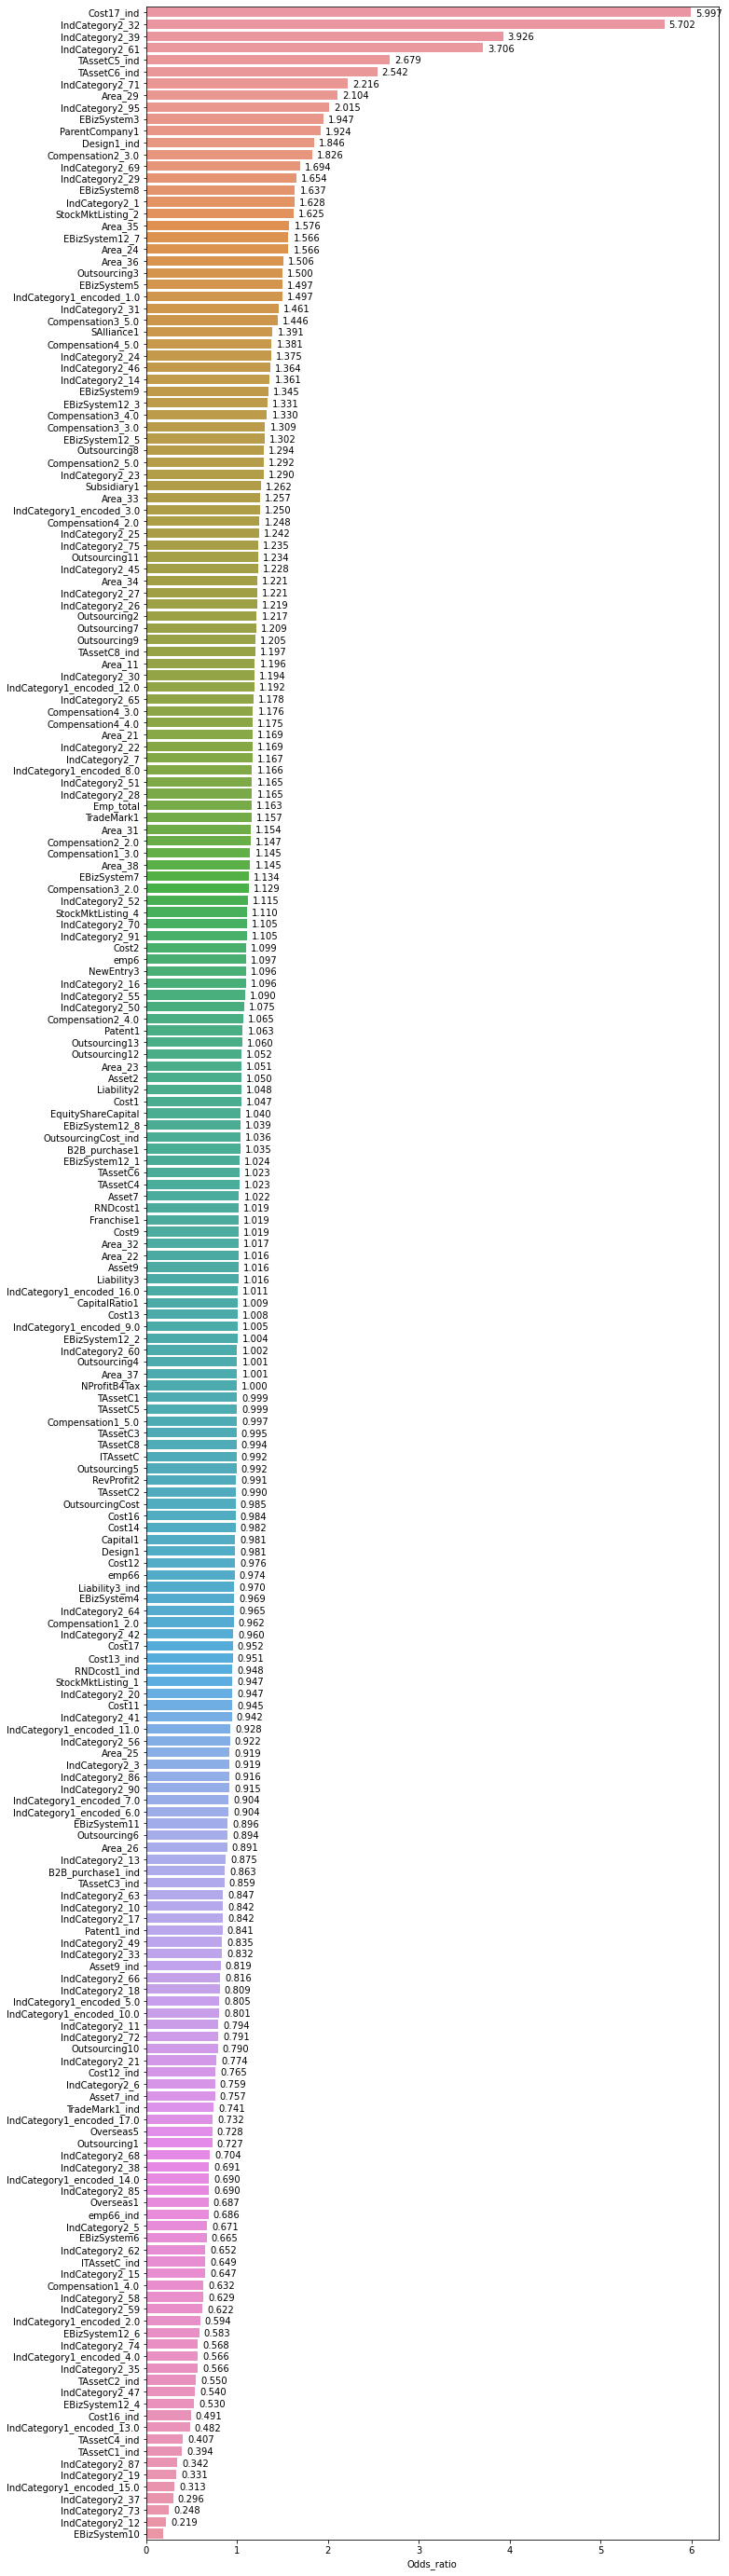

In [18]:
# 데이터프레임 dft1의 막대그래프(barplot) 그리기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(11, 50))
ax = sns.barplot(y=dft1.index, x="Odds_ratio", data=dft1)

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+1.5),
                xytext=(5, 10), textcoords='offset points')

In [35]:
# 아래 sm.Logit은 결과적으로 돌아가지 않는데, 이는 Inverting hessian failed 에러 때문이며
# 이를 치유하기 위해서는 fit() 대신에 fit_regularized(method='l1') 구문을 써야 함
import statsmodels.api as sm 
log_reg = sm.Logit(y_train, X_train2).fit(maxiter=1000, method='bfgs')

Optimization terminated successfully.
         Current function value: 0.511861
         Iterations: 866
         Function evaluations: 869
         Gradient evaluations: 869


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [36]:
# 참조 코딩
# 때문에 fit() 대신에 fit_regularized(method='l1')을 통해 L1 규제를 도입하면 해결되나 이는 Lasso 모형이 됨
import statsmodels.api as sm 
log_reg = sm.Logit(y_train, X_train2).fit_regularized(maxiter=1100, method='l1')

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5118582511275498
            Iterations: 1013
            Function evaluations: 1017
            Gradient evaluations: 1013


In [37]:
# 참조 코딩
print(log_reg.summary()) 

                           Logit Regression Results                           
Dep. Variable:            EBizSystem2   No. Observations:                 6208
Model:                          Logit   Df Residuals:                     5994
Method:                           MLE   Df Model:                          213
Date:                Tue, 21 Dec 2021   Pseudo R-squ.:                  0.2521
Time:                        10:55:37   Log-Likelihood:                -3177.6
converged:                       True   LL-Null:                       -4248.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0494      0.043      1.145      0.252      -0.035       0.134
x2             0.0205      0.019      1.091      0.275      -0.016       0.057
x3             0.0161      0.021      0.772      0.4

In [38]:
import time
start = time.time()

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
estimator = LogisticRegression(solver='saga', max_iter=10000, penalty='none', random_state=0,\
                               n_jobs=-1 ) # max_iter는 default인 100을 설정.
selector = RFE(estimator, n_features_to_select=213, step=1)
selector = selector.fit(X_train2, y_train)
selector.support_

end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 268.67053842544556


In [25]:
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [34]:
# 변수명을 Index로 만들고 ranking값을 Index에 매칭한 데이터프레임 만들기 

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.round(selector.ranking_, 1).transpose(), index=feature_names,
                   columns=['Ranking'])
dft1 = dft.sort_values(by='Ranking', ascending=False)   # 컬럼 coef의 값들을 내림차순으로 정리
dft1                                            

,Ranking
NProfitB4Tax,2
Asset2,1
IndCategory2_55,1
IndCategory2_39,1
IndCategory2_41,1
...,...
Area_33,1
Area_34,1
Area_35,1
Area_36,1


# StandardScaler로 표준화한 데이터로 Logistic Regression 실행

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('2014DC2_dummy_indicator_friendly.csv')   
df.shape

(12417, 193)

In [2]:
pd.set_option('display.max_columns', None)   # 결과물로 보여주는 열 갯수 최대화
pd.set_option('display.max_rows', None)      # 결과물로 보여주는 행 갯수 최대화

In [21]:
df.max() - df.min()

Asset2                       17.795026
Asset7                       17.730728
Asset9                       14.989356
B2B_purchase1                17.480755
Capital1                     18.703429
CapitalRatio1                 4.615121
Cost1                        18.412535
Cost11                       12.542220
Cost12                       14.726344
Cost13                       13.909209
Cost14                       18.063078
Cost16                       13.274834
Cost17                       12.662716
Cost2                        16.329646
Cost9                        13.205076
Design1                       8.999002
Emp_total                    10.799290
EquityShareCapital           10.308767
ITAssetC                     14.320115
Liability2                   19.334597
Liability3                   17.035052
NProfitB4Tax                 16.665097
OutsourcingCost              16.065830
Patent1                      10.623690
RNDcost1                     16.436981
RevProfit2               

In [6]:
# 구간 변수들만 별도로 모아 데이터프레임 df_num 만들기 
numeric_cols = ['Asset2','Asset7','Asset9','B2B_purchase1','Capital1','CapitalRatio1',\
                'Cost1','Cost11','Cost12','Cost13','Cost14','Cost16','Cost17','Cost2',\
                'Cost9','Design1','Emp_total','EquityShareCapital','ITAssetC','Liability2',\
                'Liability3','NProfitB4Tax','OutsourcingCost','Patent1','RNDcost1',\
                'RevProfit2','TAssetC1','TAssetC2','TAssetC3','TAssetC4','TAssetC5',\
                'TAssetC6','TAssetC8','TradeMark1','emp6','emp66']
df_num = df[numeric_cols]

# StandardScaler( )로 데이터 스케일 표준화를 실행하고 결과를 데이터프레임으로 만들기
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num_standard = pd.DataFrame(scaler.fit_transform(df_num))

# StandardScaler( )는 변수명을 지우기 때문에, 새로 만든 데이터프레임에 다시 변수명을 삽입
df_num_standard.columns = df_num.columns
df_num_standard.head()

,Asset2,Asset7,Asset9,B2B_purchase1,Capital1,CapitalRatio1,Cost1,Cost11,Cost12,Cost13,Cost14,Cost16,Cost17,Cost2,Cost9,Design1,Emp_total,EquityShareCapital,ITAssetC,Liability2,Liability3,NProfitB4Tax,OutsourcingCost,Patent1,RNDcost1,RevProfit2,TAssetC1,TAssetC2,TAssetC3,TAssetC4,TAssetC5,TAssetC6,TAssetC8,TradeMark1,emp6,emp66
0,0.467982,0.862735,0.324257,0.456038,0.470391,-0.372859,0.678708,0.764818,-0.121246,0.369504,1.022271,1.008824,0.740100,0.316287,0.209781,NaN,0.594367,1.283755,-0.744997,0.463431,1.172527,-1.646141,NaN,NaN,NaN,1.322521,0.066971,-0.472042,-0.622519,-0.489985,-0.986725,1.019111,1.510670,NaN,0.344221,-0.505843
1,1.332315,1.871731,1.467463,0.973183,1.407158,-0.372859,0.870163,1.366775,-0.177425,-0.863224,1.377624,0.825015,2.583997,1.561299,0.962477,-0.436618,1.368367,0.670107,-0.744997,0.912985,0.861830,1.279380,-0.587376,-0.742988,NaN,1.916620,-0.365006,-0.472042,-0.622519,-0.489985,-0.986725,-0.899169,1.033115,0.461943,1.570157,-0.505843
2,0.161186,1.009598,-0.827886,0.499167,0.262171,-0.372859,0.641947,0.775461,-0.682654,-0.863224,1.114814,0.922970,0.853060,-0.082747,-2.039459,0.242889,0.083132,-0.021702,-0.744997,0.910147,-0.169344,0.634003,-2.279667,0.030642,NaN,0.934123,-0.075584,1.232742,-0.394810,-0.489985,0.494827,0.307446,-0.510022,1.427509,0.577291,-0.505843
3,0.161186,-0.498898,NaN,NaN,0.199515,-0.372859,0.478863,-0.001573,-0.209136,-0.863224,0.936979,0.172613,0.513406,-0.152487,0.052127,-0.436618,-0.085707,0.023757,-0.744997,0.015302,0.325365,0.188870,NaN,-0.742988,NaN,0.327849,0.225693,-0.472042,-0.622519,-0.489985,-0.986725,1.861656,-0.510022,-0.717909,-0.415905,-0.505843
4,-0.649704,-1.436567,-0.972148,-0.436800,-0.339939,-0.372859,-0.134089,-0.561771,-0.830425,-0.863224,-0.085885,-1.749297,-0.086266,-1.171164,-0.596248,-0.436618,-0.630549,0.048543,-0.744997,-1.426186,-0.764930,-0.000832,NaN,-0.742988,NaN,-0.643487,0.236909,-0.472042,0.829135,1.817055,0.523263,-0.899169,1.511631,-0.717909,-1.204135,0.366023


In [7]:
df_cat = df.drop(numeric_cols, axis=1) # 원래 데이터프레임 df에서 구간변수들만 제거하여 df_cat에 저장
df_cat.columns                         # df_cat의 변수명 출력

Index(['EBizSystem2', 'EBizSystem3', 'EBizSystem4', 'EBizSystem5',
       'EBizSystem6', 'EBizSystem7', 'EBizSystem8', 'EBizSystem9',
       'EBizSystem10', 'EBizSystem11',
       ...
       'IndCategory1_encoded_8.0', 'IndCategory1_encoded_9.0',
       'IndCategory1_encoded_10.0', 'IndCategory1_encoded_11.0',
       'IndCategory1_encoded_12.0', 'IndCategory1_encoded_13.0',
       'IndCategory1_encoded_14.0', 'IndCategory1_encoded_15.0',
       'IndCategory1_encoded_16.0', 'IndCategory1_encoded_17.0'],
      dtype='object', length=157)

In [9]:
# 구간변수 스케일을 표준화한 df_num_standard와 기존 범주형 변수를 담은 df_cat을 병합
dfu_standard = pd.concat([df_num_standard, df_cat], axis=1)
dfu_standard.columns   # dfu의 변수명 출력

Index(['Asset2', 'Asset7', 'Asset9', 'B2B_purchase1', 'Capital1',
       'CapitalRatio1', 'Cost1', 'Cost11', 'Cost12', 'Cost13',
       ...
       'IndCategory1_encoded_8.0', 'IndCategory1_encoded_9.0',
       'IndCategory1_encoded_10.0', 'IndCategory1_encoded_11.0',
       'IndCategory1_encoded_12.0', 'IndCategory1_encoded_13.0',
       'IndCategory1_encoded_14.0', 'IndCategory1_encoded_15.0',
       'IndCategory1_encoded_16.0', 'IndCategory1_encoded_17.0'],
      dtype='object', length=193)

In [10]:
# 참조 코딩
dfu_standard.shape

(12417, 193)

In [12]:
dfu_standard.to_csv('ERP_standard.csv', index=False)# 병합한 데이터프레임을 csv 형태로 저장합니다. 

In [45]:
import pandas as pd
import numpy as np
df= pd.read_csv('ERP_standard.csv')   
df.shape

(12417, 193)

In [46]:
# Imputation indicator가 생성됨에 주의

data = df.drop(['EBizSystem2'], axis=1)   # 타겟변수를 제외한 변수만 data 데이터프레임에 저장
target = df['EBizSystem2']                # 타겟변수만 target 데이터프레임에 저장

# 50:50 data partition.
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    data, target, test_size=0.5, random_state=42)   # test_size=0.5임에 주의 

# interval 변수의 null value를 평균(mean)으로 대체
from sklearn.impute import SimpleImputer
imp= SimpleImputer(strategy = 'mean', add_indicator = 'True')  
X_train2= imp.fit_transform(X_train) 
X_test2= imp.fit_transform(X_test)   # X_train과 and X_test 둘 다 imputation 적용해야 함에 유의

print("X_train2 shape:", X_train2.shape) 
print("X_test2 shape:", X_test2.shape) 

X_train2 shape: (6208, 214)
X_test2 shape: (6209, 214)


In [48]:
# Logistic Regression 모형 (Default 모델)
# 워닝을 피하기 위해 위의 max_iter를 10,000으로 설정해야 함에 주의

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(solver='lbfgs',penalty='none',max_iter=10000,random_state=0,
                        n_jobs=-1)

In [49]:
import time
start = time.time()

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold  

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
params = {'solver':['lbfgs', 'saga'], 'penalty':['none']}

grid_lr = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=cross_validation,
                       n_jobs=-1)
grid_lr.fit(X_train2, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_lr.best_score_))
print("GridSearchCV best parameter:", (grid_lr.best_params_)) 

end = time.time()
print(f"Runtime of the program is {end - start}")

GridSearchCV max accuracy:0.71811
GridSearchCV best parameter: {'penalty': 'none', 'solver': 'saga'}
Runtime of the program is 82.14480209350586


In [50]:
best_clf = grid_lr.best_estimator_
pred = best_clf.predict(X_test2)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test2)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.72991
ROC AUC on test set:0.78629


In [ ]:
# 결론: 변수가 수백개인 ERP 모델에서 Standardization의 효과는 크지 않음
# 이는 우리가 취급하는 데이터셋이 로그변환을 이미 행한 스케일 조정이 된 변수들을 담고 있어서임